# **Figure 1.** Dispersions
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 04/24/2022          |
| Updated | 08/15/2022          |

## Dispersion Equivalence

We define the time-dependent gas density dispersion by
\begin{equation}
    \sigma_{\rho_\mathrm{g}} = \sqrt{\langle\delta\rho_\mathrm{g}^2\rangle - \langle\delta\rho_\mathrm{g}\rangle^2},
    \tag{1}
\end{equation}
where
\begin{equation}
    \langle g^n \rangle \equiv \frac{1}{L_x L_y L_z}\iiint g^n \mathrm{d}x\mathrm{d}y\mathrm{d}z
    \tag{2}
\end{equation}
is the volume average of time-dependent gas quantity $g$ over the computational domain and $\delta\rho_\mathrm{g} \equiv \rho_\mathrm{g} - \langle\rho_\mathrm{g}\rangle$ is the time-dependent local gas density deviation from the time-independent volume average, $\langle\rho_\mathrm{g}\rangle = \rho_\mathrm{g,0}$.
With $V \equiv L_x L_y L_z$, $\mathrm{d}V \equiv\mathrm{d}x\mathrm{d}y\mathrm{d}z $,
\begin{align}
    \langle\delta\rho_\mathrm{g}\rangle &= \frac{1}{V}\int(\rho_\mathrm{g} - \langle\rho_\mathrm{g}\rangle)\mathrm{d}V \\
    &= \frac{1}{V}\int\rho_\mathrm{g}\mathrm{d}V - \langle\rho_\mathrm{g}\rangle \\
    &= \langle\rho_\mathrm{g}\rangle - \langle\rho_\mathrm{g}\rangle = 0,
    \tag{3}
\end{align}
and
\begin{align}
    \langle\delta\rho_\mathrm{g}^2\rangle &= \frac{1}{V}\int(\rho_\mathrm{g}^2 - 2\rho_\mathrm{g}\langle\rho_\mathrm{g}\rangle + \langle\rho_\mathrm{g}\rangle^2)\mathrm{d}V \\
    &= \frac{1}{V}\int\rho_\mathrm{g}^2 \mathrm{d}V - \frac{2}{V}\langle\rho_\mathrm{g}\rangle\int\rho_\mathrm{g} \mathrm{d}V + \langle\rho_\mathrm{g}\rangle^2 \\
    &= \langle\rho_\mathrm{g}^2\rangle - 2\langle\rho_\mathrm{g}\rangle^2 + \langle\rho_\mathrm{g}\rangle^2 \\ 
    &= \langle\rho_\mathrm{g}^2\rangle - \langle\rho_\mathrm{g}\rangle^2,
    \tag{4}
\end{align}
we can rewrite Eq. (1) as
\begin{equation}
    \sigma_{\rho_\mathrm{g}} = \sqrt{\langle\rho_\mathrm{g}^2\rangle - \langle\rho_\mathrm{g}\rangle^2}.
    \tag{5}
\end{equation}

/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)
/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)
/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)
/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)
/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
 

,Run,⟨𝜎_𝜌_g⟩ / 𝜌₀,1,⟨𝜎_u_x⟩ / 𝑐ₛ,2,⟨𝜎_u_y⟩ / 𝑐ₛ,3,⟨𝜎_u_z⟩ / 𝑐ₛ,4,⟨Δu_x⟩ / 𝑐ₛ,5,⟨Δu_y⟩ / 𝑐ₛ,6,⟨𝜎_𝜌_p⟩ / 𝜌₀,7,⟨𝜎_v_x⟩ / 𝑐ₛ,8,⟨𝜎_v_y⟩ / 𝑐ₛ,9,⟨𝜎_v_z⟩ / 𝑐ₛ,10
0,AB/0.01,7.5e-06,±3e-07,2.28e-03,±3e-05,1.40e-03,±5e-05,1.68e-03,±3e-05,5.99e-04,±7e-06,-2.85e-04,±2e-05,1.97e+00,±2e-02,1.84e-03,±2e-05,1.31e-03,±5e-05,1.53e-03,±2e-05
1,AB/0.02,2.3e-05,±6e-07,4.39e-03,±5e-05,2.25e-03,±4e-05,3.10e-03,±5e-05,1.20e-03,±2e-05,-3.54e-04,±1e-05,1.94e+00,±7e-03,3.53e-03,±4e-05,2.11e-03,±4e-05,2.77e-03,±5e-05
2,AB/0.05,1.3e-04,±7e-06,1.07e-02,±3e-04,5.05e-03,±4e-04,7.60e-03,±3e-04,2.83e-03,±2e-04,-6.86e-04,±9e-05,1.88e+00,±2e-02,8.52e-03,±2e-04,4.71e-03,±3e-04,6.68e-03,±3e-04
3,AB/0.10,4.9e-04,±6e-05,2.15e-02,±1e-03,1.03e-02,±1e-03,1.47e-02,±1e-03,5.60e-03,±5e-04,-1.35e-03,±4e-04,1.87e+00,±4e-02,1.72e-02,±1e-03,9.52e-03,±1e-03,1.28e-02,±1e-03
4,BA/0.01,4.5e-04,±2e-04,2.14e-03,±7e-05,4.38e-03,±1e-03,9.30e-03,±3e-03,-8.47e-04,±2e-04,-4.20e-04,±1e-04,1.22e+00,±5e-01,3.45e-03,±3e-04,1.75e-03,±2e-04,1.04e-02,±4e-03
5,BA/0.02,1.0e-03,±4e-04,4.61e-03,±3e-04,8.05e-03,±2e-03,1.68e-02,±4e-03,-1.55e-03,±4e-04,-7.63e-04,±2e-04,1.05e+00,±4e-01,7.11e-03,±6e-04,3.57e-03,±4e-04,1.89e-02,±6e-03
6,BA/0.05,2.2e-03,±6e-04,1.17e-02,±9e-04,1.58e-02,±3e-03,3.33e-02,±7e-03,-2.55e-03,±8e-04,-1.25e-03,±4e-04,5.39e-01,±2e-01,1.68e-02,±2e-03,8.35e-03,±1e-03,3.31e-02,±8e-03
7,BA/0.10,5.3e-03,±8e-04,2.36e-02,±2e-03,2.77e-02,±3e-03,6.05e-02,±9e-03,-3.32e-03,±4e-04,-1.82e-03,±2e-04,3.79e-01,±3e-02,3.25e-02,±4e-03,1.58e-02,±2e-03,5.85e-02,±1e-02


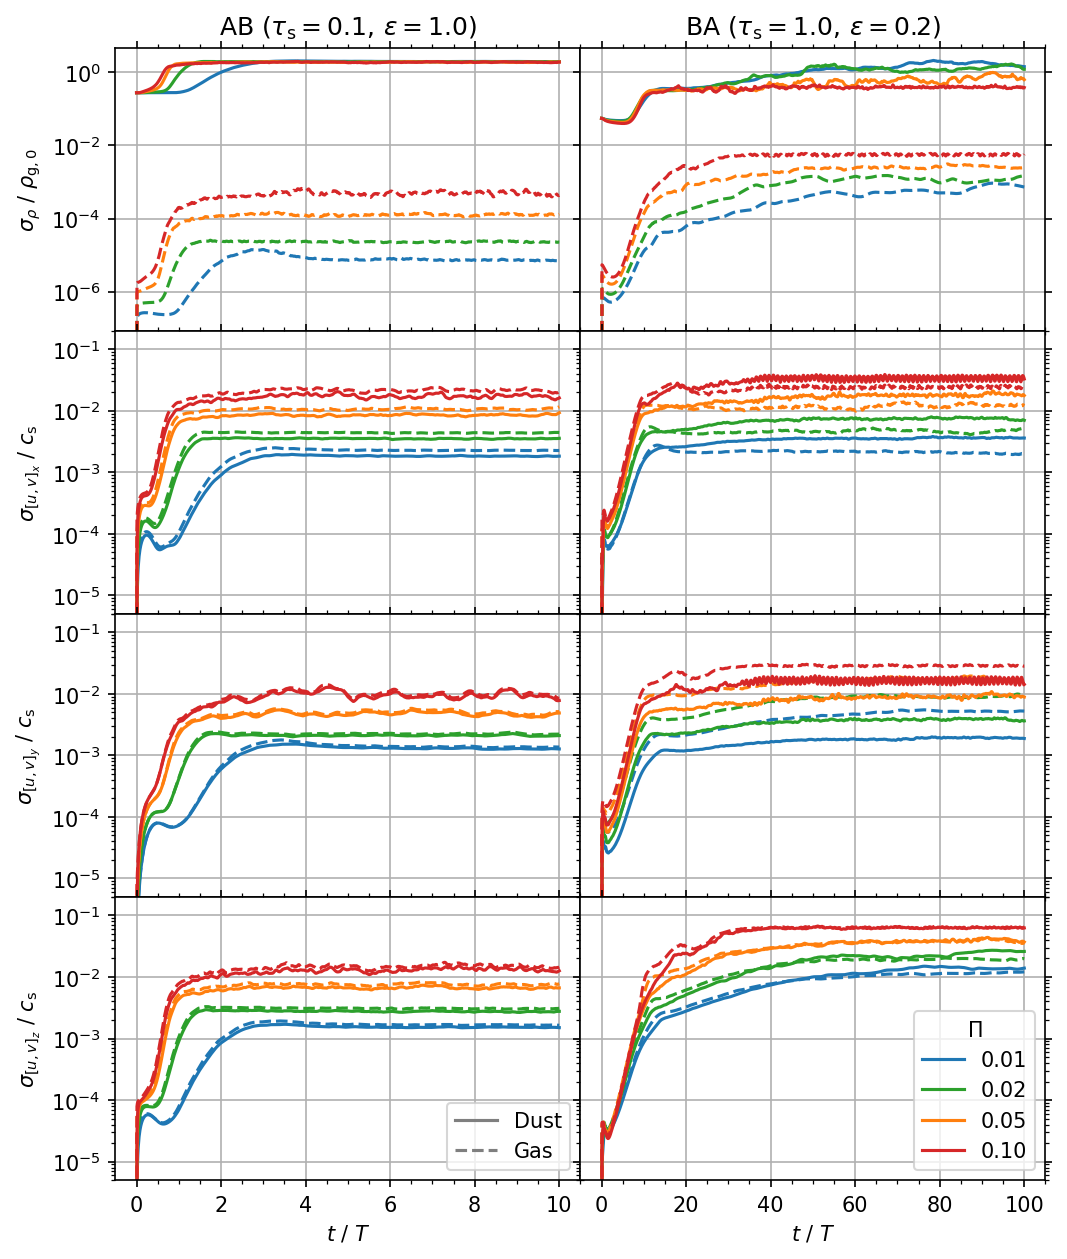

In [3]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, axs = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(8, 10), dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'
psi = 0 # 4 # Plot starting index
vylim = (5e-6, 2e-1)
runs = []
avg_sd_rhog, avg_sd_ux, avg_sd_uy, avg_sd_uz,  = [], [], [], []
err_sd_rhog, err_sd_ux, err_sd_uy, err_sd_uz,  = [], [], [], []
avg_sd_rhop, avg_sd_vx, avg_sd_vy, avg_sd_vz,  = [], [], [], []
err_sd_rhop, err_sd_vx, err_sd_vy, err_sd_vz,  = [], [], [], []
avg_Dux, avg_Duy, err_Dux, err_Duy = [], [], [], []

for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect simulation parameters and history file
        athinput = athena_read.athinput(f'{workdir}/{case}/{Pi[0]}/{res}/athinput.si')
        dt = athinput['output3']['dt']
        epsilon = athinput['problem']['epsilon']
        c_s = athinput['hydro']['iso_sound_speed']
        Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
        Ly = athinput['mesh']['x2max'] - athinput['mesh']['x2min']
        Lz = athinput['mesh']['x3max'] - athinput['mesh']['x3min']
        Mg = Lx*Ly*Lz
        Mp = epsilon*Mg
        hst = athena_read.hst(f'{workdir}/{case}/{Pi[0]}/{res}/output/SI.hst')
        i_sat = 200
        if case == 'AB' and Pi[0] == '0.01': i_sat = 400

        # Compute dispersions, gas velocity deviations, and time averages
        sd_rhog = np.sqrt(hst['drhog2'] - (hst['drhog'])**2)
        sd_ux   = np.sqrt(hst['dux2']/Mg - (hst['dux']/Mg)**2)
        sd_uy   = np.sqrt(hst['duy2']/Mg - (hst['duy']/Mg)**2)
        sd_uz   = np.sqrt(2*hst['2-KE']/Mg - (hst['2-mom']/Mg)**2)
        sd_rhop = np.sqrt(hst['drhop2'] - (hst['drhop'])**2)
        sd_vx   = np.sqrt(hst['dvpx2']/Mp - (hst['dvpx']/Mp)**2)
        sd_vy   = np.sqrt(hst['dvpy2']/Mp - (hst['dvpy']/Mp)**2)
        sd_vz   = np.sqrt(hst['dvpz2']/Mp - (hst['dvpz']/Mp)**2)
        Dux = hst['dux']/Mg
        Duy = hst['duy']/Mg
        runs.append(f'{case}/{Pi[0]}')
        avg_sd_rhog.append(np.mean(sd_rhog[i_sat:]))
        avg_sd_ux.append(np.mean(sd_ux[i_sat:])/c_s)
        avg_sd_uy.append(np.mean(sd_uy[i_sat:])/c_s)
        avg_sd_uz.append(np.mean(sd_uz[i_sat:])/c_s)
        avg_sd_rhop.append(np.mean(sd_rhop[i_sat:]))
        avg_sd_vx.append(np.mean(sd_vx[i_sat:])/c_s)
        avg_sd_vy.append(np.mean(sd_vy[i_sat:])/c_s)
        avg_sd_vz.append(np.mean(sd_vz[i_sat:])/c_s)
        avg_Dux.append(np.mean(Dux[i_sat:])/c_s)
        avg_Duy.append(np.mean(Duy[i_sat:])/c_s)
        err_sd_rhog.append(np.std(sd_rhog[i_sat:]))
        err_sd_ux.append(np.std(sd_ux[i_sat:])/c_s)
        err_sd_uy.append(np.std(sd_uy[i_sat:])/c_s)
        err_sd_uz.append(np.std(sd_uz[i_sat:])/c_s)
        err_sd_rhop.append(np.std(sd_rhop[i_sat:]))
        err_sd_vx.append(np.std(sd_vx[i_sat:])/c_s)
        err_sd_vy.append(np.std(sd_vy[i_sat:])/c_s)
        err_sd_vz.append(np.std(sd_vz[i_sat:])/c_s)
        err_Dux.append(np.std(Dux[i_sat:])/c_s)
        err_Duy.append(np.std(Duy[i_sat:])/c_s)

        # Plot dispersions
        axs[0][i].semilogy(hst['time'][psi:], sd_rhop[psi:], color=Pi[1],
                           label=Pi[0])
        axs[1][i].semilogy(hst['time'][psi:], sd_vx[psi:]/c_s, color=Pi[1],
                           label=Pi[0])
        axs[2][i].semilogy(hst['time'][psi:], sd_vy[psi:]/c_s, color=Pi[1],
                           label=Pi[0])
        axs[3][i].semilogy(hst['time'][psi:], sd_vz[psi:]/c_s,
                                 color=Pi[1], label=Pi[0])
        axs[0][i].semilogy(hst['time'][psi:], sd_rhog[psi:],   color=Pi[1],
                           ls='--')
        axs[1][i].semilogy(hst['time'][psi:], sd_ux[psi:]/c_s, color=Pi[1],
                           ls='--')
        axs[2][i].semilogy(hst['time'][psi:], sd_uy[psi:]/c_s, color=Pi[1],
                           ls='--')
        axs[3][i].semilogy(hst['time'][psi:], sd_uz[psi:]/c_s, color=Pi[1],
                           ls='--')

# Plot ghost points for colorless line style and add legends
ls_dust, = axs[3][0].semilogy([], [], color='tab:gray', label='Dust')
ls_gas,  = axs[3][0].semilogy([], [], color='tab:gray', ls='--', label='Gas')
axs[3, 0].legend(handles=[ls_dust, ls_gas], loc='lower right')
axs[3, 1].legend(loc='lower right', title=r'$\Pi$')

# Format subplots
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True)

axs[0, 0].set(title=r'AB ($\tau_\mathrm{s}=0.1,\,\epsilon=1.0)$', 
              ylabel=r'$\sigma_\rho$ / $\rho_\mathrm{g,0}$')
axs[0, 1].set(title=r'BA ($\tau_\mathrm{s}=1.0,\,\epsilon=0.2)$')
axs[1, 0].set(ylabel=r'$\sigma_{[u,v]_x}$ / $c_\mathrm{s}$', ylim=vylim)
axs[2, 0].set(ylabel=r'$\sigma_{[u,v]_y}$ / $c_\mathrm{s}$', ylim=vylim)
axs[3, 0].set(ylabel=r'$\sigma_{[u,v]_z}$ / $c_\mathrm{s}$', ylim=vylim)
axs[3, 0].set(xlabel=r'$t$ / $T$')
axs[3, 1].set(xlabel=r'$t$ / $T$')

plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('figs/dispersions.pdf', bbox_inches='tight', pad_inches=0.01)

df = pd.DataFrame({
    'Run'         : runs,
    '⟨𝜎_𝜌_g⟩ / 𝜌₀' : avg_sd_rhog,
    '1'            : err_sd_rhog,
    '⟨𝜎_u_x⟩ / 𝑐ₛ'  : avg_sd_ux,
    '2'            : err_sd_ux,
    '⟨𝜎_u_y⟩ / 𝑐ₛ'  : avg_sd_uy,
    '3'            : err_sd_uy,
    '⟨𝜎_u_z⟩ / 𝑐ₛ'  : avg_sd_uz,
    '4'            : err_sd_uz,
    '⟨Δu_x⟩ / 𝑐ₛ'   : avg_Dux,
    '5'            : err_Dux,
    '⟨Δu_y⟩ / 𝑐ₛ'   : avg_Duy,
    '6'            : err_Duy,
    '⟨𝜎_𝜌_p⟩ / 𝜌₀' : avg_sd_rhop,
    '7'            : err_sd_rhop,
    '⟨𝜎_v_x⟩ / 𝑐ₛ'  : avg_sd_vx,
    '8'            : err_sd_vx,
    '⟨𝜎_v_y⟩ / 𝑐ₛ'  : avg_sd_vy,
    '9'            : err_sd_vy,
    '⟨𝜎_v_z⟩ / 𝑐ₛ'  : avg_sd_vz,
    '10'            : err_sd_vz,})
s = df.style.format({
    '⟨𝜎_𝜌_g⟩ / 𝜌₀' : '{:.1e}',
    '1'           : '±{:.0e}',
    '⟨𝜎_u_x⟩ / 𝑐ₛ'  : '{:.2e}',
    '2'           : '±{:.0e}',
    '⟨𝜎_u_y⟩ / 𝑐ₛ'  : '{:.2e}',
    '3'           : '±{:.0e}',
    '⟨𝜎_u_z⟩ / 𝑐ₛ'  : '{:.2e}',
    '4'           : '±{:.0e}',
    '⟨Δu_x⟩ / 𝑐ₛ'   : '{:.2e}',
    '5'           : '±{:.0e}',
    '⟨Δu_y⟩ / 𝑐ₛ'   : '{:.2e}',
    '6'           : '±{:.0e}',
    '⟨𝜎_𝜌_p⟩ / 𝜌₀' : '{:.2e}',
    '7'           : '±{:.0e}',
    '⟨𝜎_v_x⟩ / 𝑐ₛ'  : '{:.2e}',
    '8'           : '±{:.0e}',
    '⟨𝜎_v_y⟩ / 𝑐ₛ'  : '{:.2e}',
    '9'           : '±{:.0e}',
    '⟨𝜎_v_z⟩ / 𝑐ₛ'  : '{:.2e}',
    '10'           : '±{:.0e}',})
s.to_latex(buf='tabs/disps.sty')
s